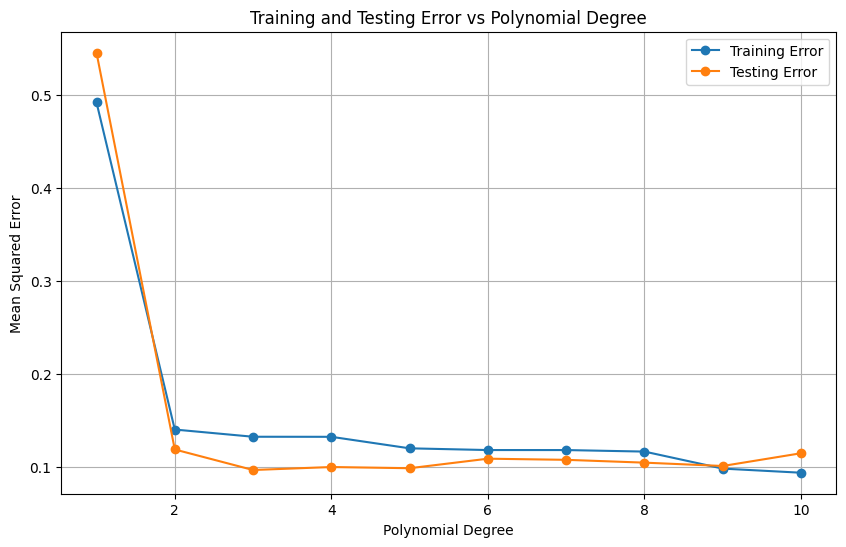

The optimal polynomial degree is: 3


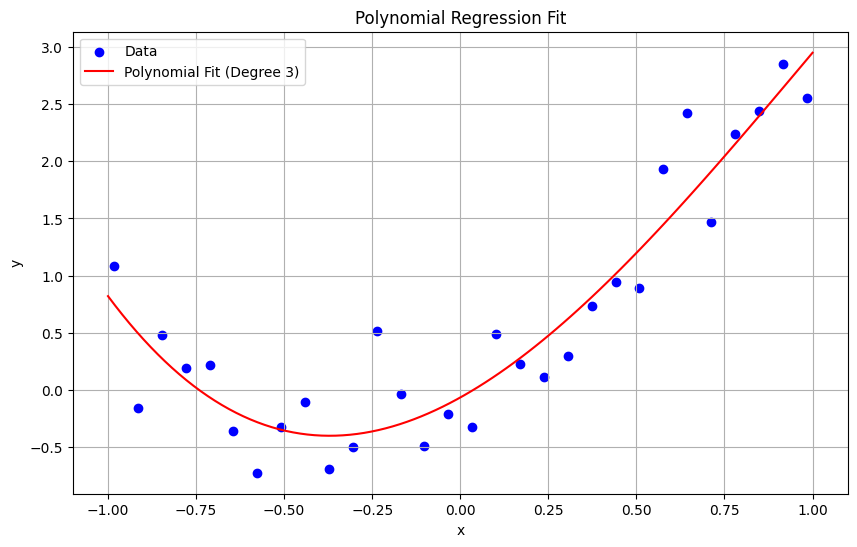

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error




# Load the dataset
file_path = 'dataset_03b.csv'  # Adjust the path if needed
data = pd.read_csv(file_path)

# Filter the dataset for x in [-1, 1]
# Filters rows where the values of column x fall within the range [-1, 1]
data_filtered = data[(data['x'] >= -1) & (data['x'] <= 1)] 
# Extracts the x column from the filtered data and reshapes it into a 2D array (necessary for scikit-learn)
X = data_filtered['x'].values.reshape(-1, 1)
# Extracts the  y column as a 1D array, which contains the target variable.
y = data_filtered['y'].values

# Split the data into training and testing sets
# Splits the dataset into training (80%) and testing (20%) subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to store training and testing errors
# Empty lists to store training and testing errors (Mean Squared Errors) for different polynomial degrees.
train_errors = []
test_errors = []

# Evaluate polynomial regression models for degrees 1 to 10

degrees = range(1, 11) # Specifies the range of polynomial degrees to evaluate (from 1 to 10).
for degree in degrees:
    # Create polynomial features
    # For degree 2, the columns are 1,x,x^2
    # For degree 3, the columns are 1,x,x^2,x^3
    poly = PolynomialFeatures(degree=degree) #Creates polynomial features for the current degree
    X_train_poly = poly.fit_transform(X_train)#Generates polynomial features for the training set and fits the transformer.
    X_test_poly = poly.transform(X_test)#Transforms the testing set using the fitted transformer.

    # Fit the linear regression model
    model = LinearRegression()
    #  Fits the linear regression model to the training data (polynomial features and targets).
    # The model learns the coefficients of the polynomial,For degree 2, y=ax^2+bx+c
    # For degree 3, y=ax^3+bx^2+cx+d
    model.fit(X_train_poly, y_train)

    # Predict and calculate errors
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Calculates the MSE for predictions compared to actual values.
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Plot training and testing errors
# Creates a plot showing how the training and testing errors vary with the polynomial degree.
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Training Error', marker='o')
plt.plot(degrees, test_errors, label='Testing Error', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Training and Testing Error vs Polynomial Degree')
plt.legend()
plt.grid()
plt.show()

# Find the optimal degree (degree with minimum testing error)
optimal_degree = degrees[np.argmin(test_errors)]
print(f"The optimal polynomial degree is: {optimal_degree}")

# Visualize the polynomial fit for the optimal degree
poly = PolynomialFeatures(degree=optimal_degree)#Re-generates polynomial features for the entire dataset using the optimal degree.
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)#Fits the linear regression model using all the data.

# Generate predictions for visualization
X_fit = np.linspace(-1, 1, 100).reshape(-1, 1)
X_fit_poly = poly.transform(X_fit)
y_fit = model.predict(X_fit_poly)

# Plot the data and the fitted polynomial
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data', color='blue')
plt.plot(X_fit, y_fit, label=f'Polynomial Fit (Degree {optimal_degree})', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.grid()
plt.show()


The plot of training and testing errors as a function of polynomial degree provides key insights into model performance
Initial Degrees (1-2):

At lower degrees (e.g., degree 1), both training and testing errors are high. This suggests underfitting because the polynomial is too simple to capture the nonlinear patterns in the data.

Optimal Range (2-4):

The testing error decreases sharply at degree 2 and stabilizes around degrees 3–4. The training error is also relatively low and stable. This indicates that these degrees balance bias and variance, making the model a good fit for the data.
The degree at which the testing error is minimal is considered the optimal degree.

Higher Degrees (5 and above):

Beyond degree 5, testing errors begin to fluctuate slightly, and the difference between training and testing errors increases for some degrees. This trend suggests a slight tendency towards overfitting, where the model becomes increasingly complex and starts to fit noise in the training data.


The plot shows the data points (blue dots) and the polynomial regression curve (red line) for degree
Polynomial Fit:

The red line (degree 3 polynomial) captures the nonlinear relationship between x and y.It curves appropriately to fit the general trend of the data, including the upward trend for positive x values and the downward trend for negative x.

Data Coverage:
The polynomial passes through or near many data points, reflecting a good fit for the majority of the data distribution.
However, some points deviate significantly from the curve (e.g., around x=-0.5 and x=0.05, which could represent noise or outliers in the data.

Smoothness:
The curve is smooth and does not overreact to individual points. This aligns with avoiding overfitting, as the model does not attempt to "memorize" every data point.
